# Telecommunication Company Churn Rate
## by Jesse Njenga

## Introduction
This project will analyze the churn rate dataset of a telecommunication company based in Califonia,USA for Q2 2022. The dataset was downloaded from Kaggle.The Customer Churn table contains information on all 7,043 customers from the Telecommunications company. Each record represents one customer, and contains the below details:-

**CustomerID** - A unique ID that identifies each customer.

**Gender**	- The customer’s gender: Male, Female.

**Age**	- The customer’s current age, in years, at the time the fiscal quarter ended (Q2 2022).

**Married**	- Indicates if the customer is married: Yes, No

**Number of Dependents** - Indicates the number of dependents that live with the customer (dependents could be children, parents, grandparents, etc.)

**City** - The city of the customer’s primary residence in California

**Zip Code** - The zip code of the customer’s primary residence

**Latitude** - The latitude of the customer’s primary residence

**Longitude** - The longitude of the customer’s primary residence

**Number of Referrals**	- Indicates the number of times the customer has referred a friend or family member to this company to date

**Tenure in Months** - Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above

**Offer**  - Identifies the last marketing offer that the customer accepted: None, Offer A, Offer B, Offer C, Offer D, Offer E

**Phone Service** -	Indicates if the customer subscribes to home phone service with the company: Yes, No

**Avg Monthly Long Distance Charges** -	Indicates the customer’s average long distance charges, calculated to the end of the quarter specified above (if the customer is not subscribed to home phone service, this will be 0)

**Multiple Lines** - Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No (if the customer is not subscribed to home phone service, this will be No)

**Internet Service** - Indicates if the customer subscribes to Internet service with the company: Yes, No

**Internet Type** -	Indicates the customer's type of internet connection: DSL, Fiber Optic, Cable (if the customer is not subscribed to internet service, this will be None)

**Avg Monthly GB Download** - Indicates the customer’s average download volume in gigabytes, calculated to the end of the quarter specified above (if the customer is not subscribed to internet service, this will be 0)

**Online Security** - Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No (if the customer is not subscribed to internet service, this will be No)

**Online Backup** -	Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No (if the customer is not subscribed to internet service, this will be No)

**Device Protection Plan** - Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No (if the customer is not subscribed to internet service, this will be No)

**Premium Tech Support** - Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No (if the customer is not subscribed to internet service, this will be No)

**Streaming TV** - Indicates if the customer uses their Internet service to stream television programing from a third party provider at no additional fee: Yes, No (if the customer is not subscribed to internet service, this will be No)

**Streaming Movies** - Indicates if the customer uses their Internet service to stream movies from a third party provider at no additional fee: Yes, No (if the customer is not subscribed to internet service, this will be No)

**Streaming Music** - Indicates if the customer uses their Internet service to stream music from a third party provider at no additional fee: Yes, No (if the customer is not subscribed to internet service, this will be No)

**Unlimited Data** - Indicates if the customer has paid an additional monthly fee to have unlimited data downloads/uploads: Yes, No (if the customer is not subscribed to internet service, this will be No)

**Contract** - Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year

**Paperless** - Billing	Indicates if the customer has chosen paperless billing: Yes, No

**Payment Method** - Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

**Monthly Charge** -Indicates the customer’s current total monthly charge for all their services from the company

**Total Charges** Indicates the customer’s total charges, calculated to the end of the quarter specified above

**Total Refunds**	Indicates the customer’s total refunds, calculated to the end of the quarter specified above

**Total Extra Data Charges** Indicates the customer’s total charges for extra data downloads above those specified in their plan, by the end of the quarter specified above

**Total Long Distance Charges**	Indicates the customer’s total charges for long distance above those specified in their plan, by the end of the quarter specified above

**Total Revenue**	Indicates the company's total revenue from this customer, calculated to the end of the quarter specified above (Total Charges - Total Refurnds + Total Extra Data Charges + Total Lond Distance Charges)

**Customer Status**	Indicates the status of the customer at the end of the quarter: Churned, Stayed, or Joined

**Churn Category**	A high-level category for the customer’s reason for churning, which is asked when they leave the company: Attitude, Competitor, Dissatisfaction, Other, Price (directly related to Churn Reason)

**Churn Reason**	A customer’s specific reason for leaving the company, which is asked when they leave the company (directly related to Churn Category)

**Zip Code**	The zip code of the customer’s primary residence

**Population**	A current population estimate for the entire Zip Code area


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
data = pd.read_csv('telecom_customers_churn.csv')

## Assessing Data

In [3]:
data.head(5)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [4]:
# rows & columns
data.shape

(7043, 38)

In [5]:
#replace the column names spaces
df_col = data.columns.str.replace(' ','_')

#reassign
data.columns = df_col

In [6]:
#convert column names to lowercase
df_cols = data.columns.str.lower()

#reassign
data.columns = df_cols

In [7]:
#remove unwanted columns in the study
data.drop(['zip_code','latitude','longitude','paperless_billing','payment_method','contract'], axis=1, inplace=True)

In [8]:
#convert the columns from a plain object type into an ordered categorical type

internet_types = ['Cable', 'DSL', 'Fiber Optic']
offer_types = ['Offer A', 'Offer B', 'Offer C','Offer D','Offer E','None']

# Returns the types for internet type, customer status,churn category with the categories and orderedness
internet = pd.api.types.CategoricalDtype(ordered=True, categories=internet_types)
offers = pd.api.types.CategoricalDtype(ordered=True, categories=offer_types)

# Use pandas.astype() to convert the columns from a plain object type into an ordered categorical type 
data['internet_type'] = data['internet_type'].astype(internet);
data['offer'] = data['offer'].astype(offers);


In [41]:
#remove unwanted rows, Joined & other
telecom = data.loc[(data.customer_status != 'Joined')& (data.churn_category != 'Other')]

In [42]:
#test if removed
telecom.groupby(['customer_status']).customer_status.count().sort_values(ascending=False).reset_index(name='Total')

,customer_status,Total
0,Stayed,4720
1,Churned,1687


In [43]:
#test if removed
telecom.groupby(['churn_category']).churn_category.count().sort_values(ascending=False).reset_index(name='Total')

,churn_category,Total
0,Competitor,841
1,Dissatisfaction,321
2,Attitude,314
3,Price,211


This project will focus more on the causes of churn for the period ended Q2 2022. I have dropped rows for client who joined in the quarter and also rows for clients whose churn category was Other. Reasons for churning under Other are mainly the customer moved, they were deceased or the company did not know the reason for the churn. These reasons are not in control of the company.

In [13]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6861 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   customer_id                        6861 non-null   object  
 1   gender                             6861 non-null   object  
 2   age                                6861 non-null   int64   
 3   married                            6861 non-null   object  
 4   number_of_dependents               6861 non-null   int64   
 5   city                               6861 non-null   object  
 6   number_of_referrals                6861 non-null   int64   
 7   tenure_in_months                   6861 non-null   int64   
 8   offer                              6861 non-null   category
 9   phone_service                      6861 non-null   object  
 10  avg_monthly_long_distance_charges  6195 non-null   float64 
 11  multiple_lines                     6195 non

In [14]:
# descriptive statistics for numeric variables
telecom.describe()

,age,number_of_dependents,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
count,6861.000000,6861.000000,6861.000000,6861.000000,6195.000000,5338.000000,6861.000000,6861.000000,6861.000000,6861.000000,6861.000000,6861.000000
mean,46.476607,0.478210,1.989652,32.761697,25.452978,26.322218,63.298674,2300.467700,1.992934,6.859058,757.884737,3063.218561
std,16.751074,0.970707,3.026613,24.577649,14.187351,19.578918,31.328700,2274.928141,7.965164,25.114933,850.952171,2874.676159
min,19.000000,0.000000,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,0.000000,9.000000,13.130000,13.000000,29.650000,412.550000,0.000000,0.000000,73.120000,626.550000
50%,46.000000,0.000000,0.000000,29.000000,25.730000,21.000000,69.850000,1405.300000,0.000000,0.000000,413.280000,2135.590000
75%,60.000000,0.000000,3.000000,56.000000,37.690000,30.000000,89.650000,3838.750000,0.000000,0.000000,1202.180000,4858.830000
max,80.000000,9.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


### What is the structure of your dataset?

There are 7043 customers in the dataset with 38 features. Majority of the features are categorical with a few numerical.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out which features are best for predicting the churn rate of the customers. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect internet type, total charges, total extra data charges,total long distance charge, offer, number of referals to have the strongest effect on the Internet service customers churn rate.

Online Security,Device Protection Plan,Online backup, Premium Tech Support will have a smaller effect on the churn outcome of customers.                       

## Univariate Exploration

I will start by looking at the customer status and the categories of churn for the Q2 2022.


,customer_status,Total
0,Stayed,4720
1,Churned,1869


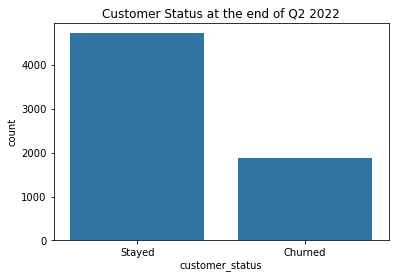

In [17]:
#customer status
base_color = sb.color_palette()[0]

telecom = data.loc[data.customer_status != 'Joined']
sb.countplot(data=telecom, x='customer_status', color = base_color );
plt.title('Customer Status at the end of Q2 2022')

telecom.groupby(['customer_status']).customer_status.count().sort_values(ascending=False).reset_index(name='Total')

A large percentage of the clients churned total of 1,869. 

This been 27% of the customers and might be a substiantial amount in terms of revenue lost. This is substantial and the study will seek to find out the features contributing to the churn. 

I will look at the **churn category** next

In [18]:
# Get the unique values of the `churn category` column, in the decreasing order of the frequency.
churn_counts = telecom['churn_category'].value_counts()
churn_order = churn_counts.index

,churn_category,Total
0,Competitor,841
1,Dissatisfaction,321
2,Attitude,314
3,Price,211


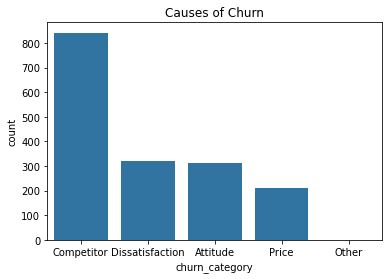

In [26]:
#distribution of churned customers
base_color = sb.color_palette()[0]
telecom = data.loc[data.churn_category != 'Other']
sb.countplot(data=telecom, x='churn_category', color = base_color, order=churn_order );
plt.title('Causes of Churn')

telecom.groupby(['churn_category']).churn_category.count().sort_values(ascending=False).reset_index(name='Total')

#### Main contributor for churn
 
Majority of the churns were attributed to competitors, dissatisfaction of customers by the companys services and support services, attitude of the company and company personel & finally prices of the services offered by the company.

**Other** will not be given much weight in this study as these are customers who churned due to reasons such as they were deacesed, moved and unknown.

I will proceed to the other features of interest starting with different **Offers** the company offers to customers.

,offer,Total
0,None,3760
1,Offer B,819
2,Offer E,769
3,Offer D,589
4,Offer A,518
5,Offer C,406


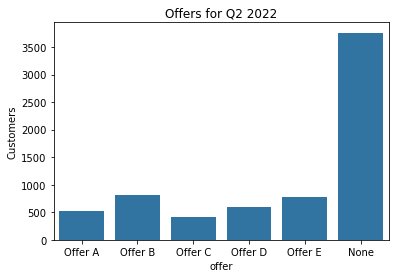

In [27]:
#plot for various offers 

base_color = sb.color_palette()[0]
sb.countplot(data=telecom, x='offer', color = base_color);
plt.title('Offers for Q2 2022')
plt.ylabel('Customers')

telecom.groupby(['offer']).offer.count().sort_values(ascending=False).reset_index(name='Total')

Majority of the customers were not given any offer.The popular offers were Offer B, offer E, offer D, offer A & offer C respectively.

We shall at the other features of interest starting with **Total charges**

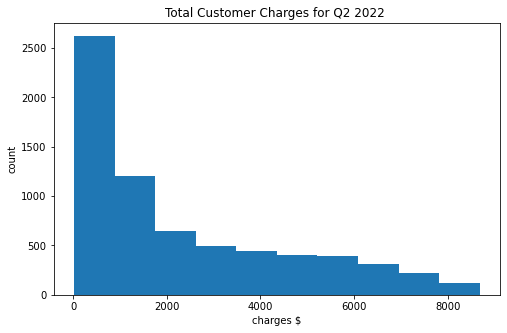

In [28]:
#total charges plot
plt.figure(figsize=[8, 5])
plt.hist(data = telecom, x = 'total_charges')
plt.title('Total Customer Charges for Q2 2022 ')
plt.xlabel('charges $')
plt.ylabel('count')
plt.show()

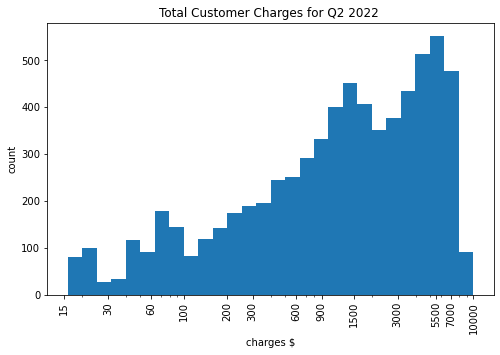

In [29]:
# Scale the x-axis to log-type, and change the axis limit
plt.figure(figsize=[8, 5])

bins = 10 ** np.arange(1.2, 4+0.1, 0.1)
ticks = [15, 30,60, 100,200,300,600,900,1500, 3000, 5500,7000, 10000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

plt.hist(data = telecom, x = 'total_charges', bins = bins);

plt.xscale('log')

plt.title('Total Customer Charges for Q2 2022 ')
plt.xlabel('charges $')
# Apply x-ticks
plt.xticks(ticks, labels);
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.show()

Total charges per customers has a long-tailed distribution, with a lot of customers charged below USD 2000. Since the first figure is skewed to the right and I scaled the x-axis to log-type, and changed the axis limit. From the plot majority of the clients are charged between USD 900 & USD 7000 for the quarter.

I will proceed to the other features : **total_extra_data_charges**

In [17]:
telecom.total_extra_data_charges.describe()

count    7043.000000
mean        6.860713
std        25.104978
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       150.000000
Name: total_extra_data_charges, dtype: float64

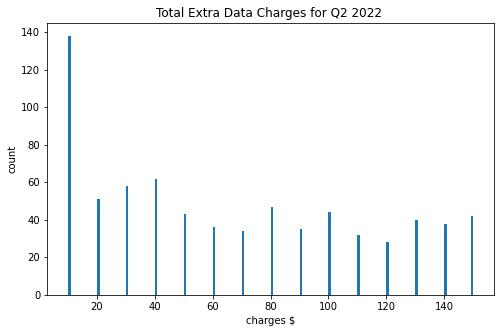

In [18]:
plt.figure(figsize=[8, 5])

bins = np.arange(10, telecom['total_extra_data_charges'].max()+1, 1)

plt.hist(data = telecom, x = 'total_extra_data_charges', bins = bins);

plt.title('Total Extra Data Charges for Q2 2022 ')
plt.xlabel('charges $')
plt.ylabel('count')
plt.show()


Majority of the clients were charged an extra USD 10 for their data charges. The maximum data charges for the quarter is $ 150

I will now look at the categorical features and see if they hold any interesting properties.

In [130]:
#value_counts for categorical columns
gender_count = telecom.gender.value_counts()
married_count = telecom.married.value_counts()
offer_count = telecom.offer.value_counts()
internet_type_count = telecom.internet_type.value_counts()
online_security_count = telecom.online_security.value_counts()
online_backup_count = telecom.online_backup.value_counts()
device_protection_plan_count = telecom.device_protection_plan.value_counts()
premium_tech_support_count = telecom.premium_tech_support.value_counts()

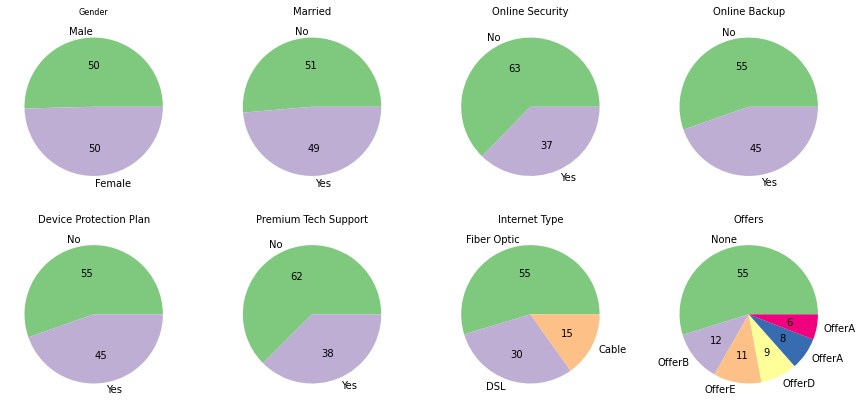

In [131]:
#plotting pie charts for categorical columns

fig, ax = plt.subplots(2,4, figsize=(15, 7))
colors = sb.color_palette('Accent')

labels = ['Male','Female']
ax[0][0].pie(gender_count, autopct='%.0f', colors=colors, labels=labels)
ax[0][0].set_title('Gender', weight='light',fontsize=8)

ax[0][1].pie(married_count, autopct='%.0f', colors=colors, labels=['No', 'Yes'])
ax[0][1].set_title('Married', weight='light',fontsize=10)

ax[0][2].pie(online_security_count, autopct='%.0f', colors=colors,labels=['No', 'Yes'])
ax[0][2].set_title('Online Security', weight='light',fontsize=10)

ax[0][3].pie(online_backup_count, autopct='%.0f', colors=colors,labels=['No', 'Yes'])
ax[0][3].set_title('Online Backup', weight='light',fontsize=10)

ax[1][0].pie(device_protection_plan_count, autopct='%.0f', colors=colors,labels=['No', 'Yes'])
ax[1][0].set_title('Device Protection Plan', weight='light',fontsize=10)

ax[1][1].pie(premium_tech_support_count, autopct='%.0f', colors=colors,labels=['No', 'Yes'])
ax[1][1].set_title('Premium Tech Support', weight='light',fontsize=10)

ax[1][2].pie(internet_type_count, autopct='%.0f', colors=colors,labels=['Fiber Optic','DSL','Cable'])
ax[1][2].set_title('Internet Type', weight='light',fontsize=10)

ax[1][3].pie(offer_count, autopct='%.0f', colors=colors,labels=['None', 'OfferB','OfferE','OfferD','OfferA', 'OfferA'])
ax[1][3].set_title('Offers', weight='light',fontsize=10)

plt.show()

There is a gender balance in our data, Majority of the clients have not subscribed to Online security, Online backup, Device protection plan, Premium tech support.
Majority of Customers internet connection type is Fiber Optic, DSL and finally cable.

I will look at the **number of referrals** made by customers

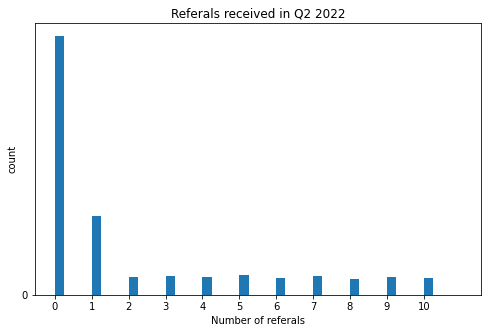

In [44]:
#plot for number of referrals
plt.figure(figsize=[8, 5])

bins = np.arange(0, telecom['number_of_referrals'].max()+1/4, 1/4)
ticks = [0,1,2,3,4,5,6,7,8,9,10]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

plt.hist(data = telecom, x = 'number_of_referrals', bins = bins);

plt.title('Referals received in Q2 2022')
plt.xticks(ticks, labels);
plt.xlabel('Number of referals')
plt.yticks(np.arange(0, 200, 600)) 
plt.ylabel('count')
plt.show()

Majority of the clients did not make any referrals. For all referrals received, one referral was made by majority of the customers, there is also customers who have 2-10 referrals and hence I conclude there are a number of royal customers.

Next I will look at **Long distance charges**

In [22]:
np.log10(telecom.total_long_distance_charges.describe())

C:\Users\jesse.njenga\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    3.847758
mean     2.874539
std      2.927709
min          -inf
25%      1.848466
50%      2.603621
75%      3.075948
max      3.552025
Name: total_long_distance_charges, dtype: float64

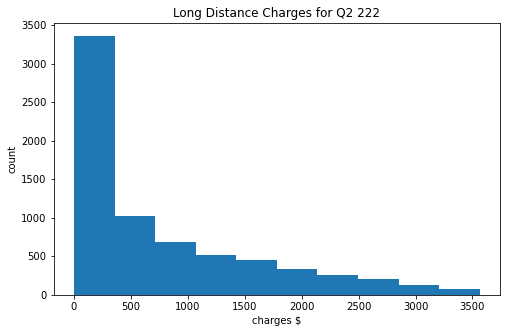

In [23]:
#histogram for long distance charges

plt.figure(figsize=[8, 5])
plt.hist(data = telecom, x = 'total_long_distance_charges')

plt.title('Long Distance Charges for Q2 222')
plt.xlabel('charges $')
plt.ylabel('count')
plt.show()

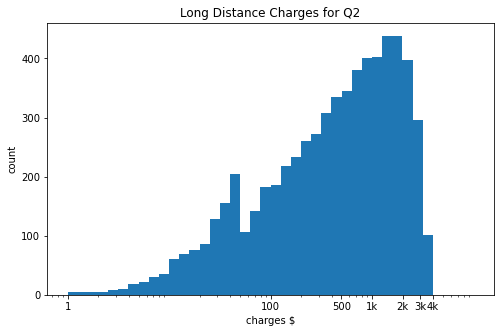

In [24]:
# Scale the x-axis to log-type, and change the axis limit
plt.figure(figsize=[8, 5])

bins = 10 ** np.arange(0, 4+0.1, 0.1)

plt.hist(data = telecom, x = 'total_long_distance_charges', bins = bins);

plt.xscale('log')

plt.title('Long Distance Charges for Q2')
plt.xlabel('charges $')
# Apply x-ticks
plt.xticks([1, 100, 500, 1e3, 2e3, 3e3, 4e3], [1, 100, 500, '1k', '2k', '3k', '4k'])
plt.ylabel('count')
plt.show()

The first plot was long tailed and I decided to use log scale. Majority of the customers are charged between 500 & 3k for their long distance services.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The total charges, total long distance charges variable took on a large range of values, so I looked at the data using a log transform.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Customers with other as the churn reason were dropped, the reasons for churning were not in control of the company and hence not considered in the study. Customers who also joined and the quarter were dropped as the study is mostly interested on the causes of churn.

## Bivariate Exploration

To start off with, I want to look at the relationship between the categorical variables and the predictor variable.

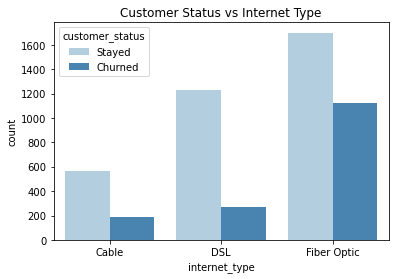

,customer_status,internet_type,count
0,Churned,Cable,191
1,Churned,DSL,267
2,Churned,Fiber Optic,1119
3,Stayed,Cable,561
4,Stayed,DSL,1230
5,Stayed,Fiber Optic,1698


In [146]:
#plot internet_type vs customer status

sb.countplot(data = telecom, x = 'internet_type', hue = 'customer_status', palette = 'Blues');
plt.title('Customer Status vs Internet Type');
plt.show()

telecom.groupby(['customer_status','internet_type'])['customer_status'].count().reset_index(name='count')

In [124]:
fiber = telecom.query('internet_type == "Fiber Optic" and customer_status == "Churned"')

,churn_reason,count
0,Competitor had better devices,219
1,Competitor made better offer,219
2,Attitude of support person,133
3,Competitor offered more data,87
4,Attitude of service provider,66
5,Competitor offered higher download speeds,62
6,Product dissatisfaction,53
7,Price too high,53
8,Network reliability,45
9,Service dissatisfaction,43


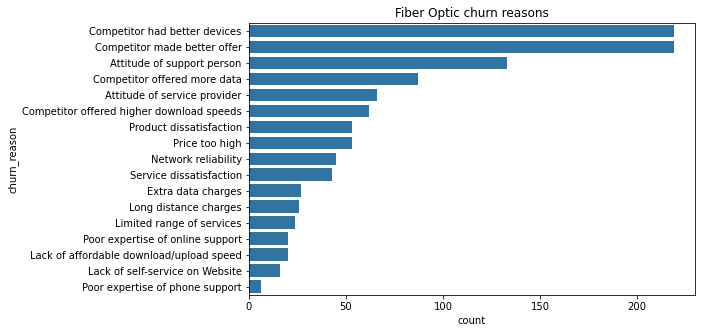

In [142]:
#plot for churn reason for fiber optic churns

plt.figure(figsize=[8, 5])

base_color = sb.color_palette()[0]
fiber_churn_reasons = fiber.groupby(['churn_reason'])['churn_reason'].size().sort_values(ascending=False).reset_index(name='count')
sb.barplot(data = fiber_churn_reasons, y = 'churn_reason', x='count', color = base_color);
plt.title('Fiber Optic churn reasons')

fiber.groupby(['churn_reason'])['churn_reason'].size().sort_values(ascending=False).reset_index(name='count')

It appears that a large number of the customers who churned were under a fiber optic connection.Its interesting that 40% of the fiber optic client churned, I investigated further the reason for churn for the Fiber optic customers. The top reasons for churn were competitors had better devices, made better offers and data. Besides, the attitude of the support persons was also a major reason.

Next I will look at the relationship between **Online security, Online backup, Device protection plan,Premium tech support and Churn category**

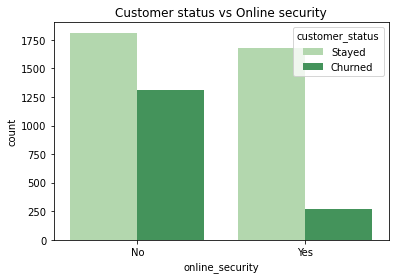

In [47]:
#plot 1: Customer status vs online_security
sb.countplot(data = telecom, x = 'online_security', hue = 'customer_status', palette = 'Greens');
plt.title('Customer status vs Online security');

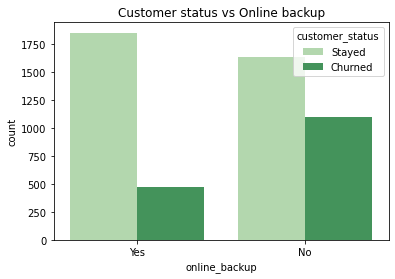

In [48]:
#plot 2: internet_type vs online_backup
sb.countplot(data = telecom, x = 'online_backup', hue = 'customer_status', palette = 'Greens');
plt.title('Customer status vs Online backup');

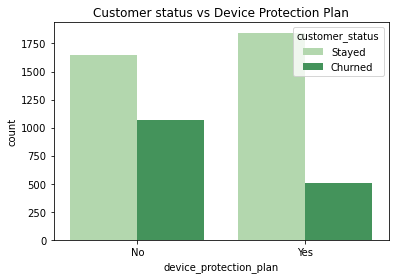

In [49]:
#plot 3: internet_type vs device_protection_plan
sb.countplot(data = telecom, x = 'device_protection_plan', hue = 'customer_status', palette = 'Greens');
plt.title('Customer status vs Device Protection Plan');

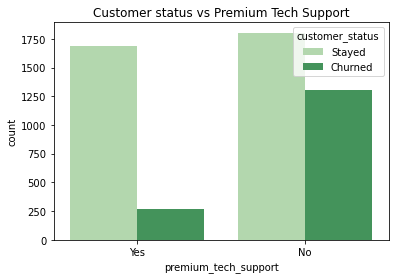

In [50]:
#plot 4: internet_type vs premium_tech_support
sb.countplot(data = telecom, x = 'premium_tech_support', hue = 'customer_status', palette = 'Greens');
plt.title('Customer status vs Premium Tech Support');

From the above plots, For each feature, majority of the customers who churned had not subscribed to any plan that is online security plan, online backup plan, online protection plan and premium tech support subscription.

I will look at the relationship between **Total charges** and the **Customer status**

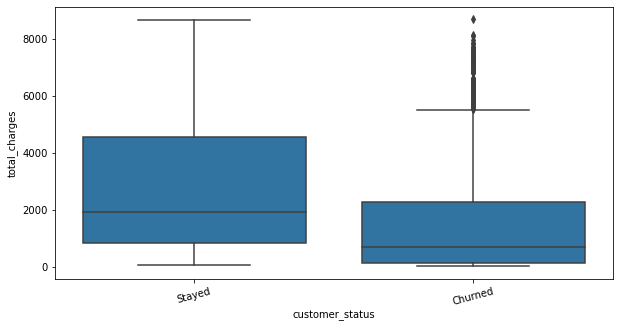

In [51]:
#Total charges vs customer status
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

sb.boxplot(data=telecom, x='customer_status', y='total_charges', color=base_color)
plt.xticks(rotation=15);


From the boxplot, its interesting majority of the customers who churned were charged lower than those who stayed. 

Next, I will look at the relationship between **Total charges** and the **Churn Category**

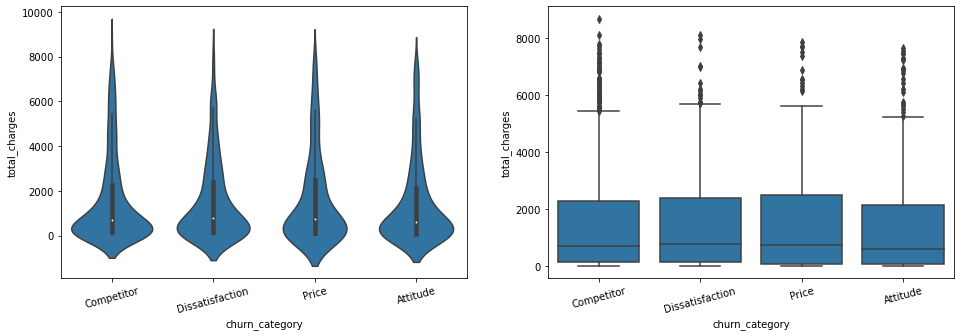

In [52]:
#Total charges vs customer status
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data=telecom, x='churn_category', y='total_charges', color=base_color)
plt.xticks(rotation=15);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=telecom, x='churn_category', y='total_charges', color=base_color)
plt.xticks(rotation=15);

Majority Customers who churned was due to dissatifaction of the services were the highest charged, followed by price and competitors. Besides, We have the highest outliers in the competitors which shows we had several clients who billed highly. Finally,attitude of the company and its staff. 

We shall look at the relationship between **Extra data charges** and the **churn category** for clients who subscribed for internet services.

In [53]:
#Internet service customers who were charges $ 10 or more dollars
internet = telecom.query('internet_service == "Yes" & total_extra_data_charges >= 10')

,count,total_extra_data_charges
customer_status,,
Churned,219,12120
Stayed,445,33860


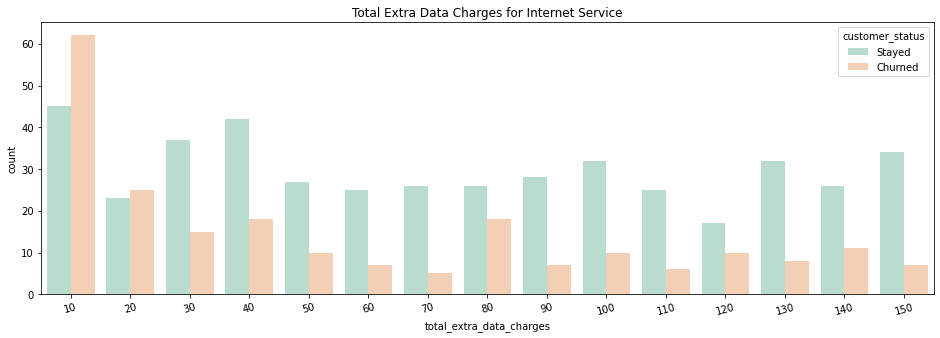

In [65]:
#Total charges vs customer status
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

ax = sb.countplot(data = internet, x = 'total_extra_data_charges', hue = 'customer_status', palette = 'Pastel2');
plt.title('Total Extra Data Charges for Internet Service')
plt.xticks(rotation=15);
#ax.set_ylim(0, 45);

pd.pivot_table(
   internet,
   index=['customer_status'],
   aggfunc={'total_extra_data_charges': np.sum, 'customer_status': len}
).rename(columns={'customer_status': 'count'})

Its interesting as the charges for extra data charges increased the churn rate reduced.

We shall look at the relationship between **churn category**  and **long distance charges** for customers who subscribed to phone services.

In [55]:
#Phone service customers 
phone = telecom.query('phone_service == "Yes"')

,count,total_long_distance_charges
customer_status,,
Churned,1533,734932.98
Stayed,4246,4447605.00


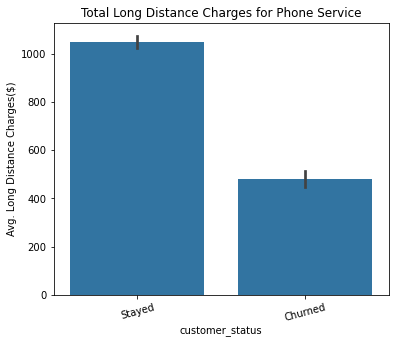

In [63]:
#Total long distance charges vs customer status
plt.figure(figsize = [6, 5])

#pointplot
#sb.pointplot(data=phone,x='customer_status', y='total_long_distance_charges', color=base_color, ci='sd', linestyles="");
sb.barplot( data=phone ,x='customer_status', y='total_long_distance_charges', color=base_color);
plt.xticks(rotation=15);
plt.title('Total Long Distance Charges for Phone Service')
plt.ylabel('Avg. Long Distance Charges($)');

pd.pivot_table(
   phone,
   index=['customer_status'],
   aggfunc={'total_long_distance_charges': np.sum, 'customer_status': len}
).rename(columns={'customer_status': 'count'})


A total of 1533 customers churned, this translates to $ 734932.98 of revenue lost.

Next, I will look at the relationship between **offers** and **customer status** 

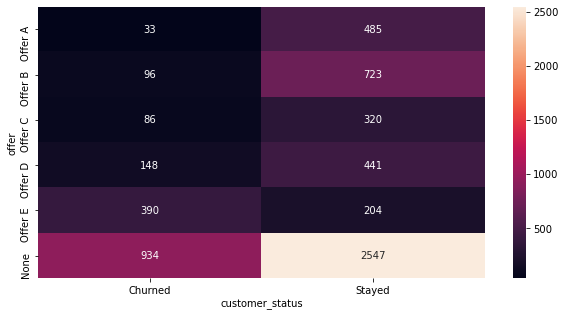

In [150]:
offer_count = telecom.groupby(['offer', 'customer_status']).size()

# Use DataFrame.pivot() to rearrange the data
offer_count = offer_count.reset_index(name='count')

offer_count = offer_count.pivot(index = 'offer', columns = 'customer_status', values = 'count')

plt.figure(figsize = [10, 5])
sb.heatmap(offer_count, annot = True, fmt = '.0f');

Majority of the churned customers did not receive any offer, for customers who received offer E majority churned.

I will look at the relationship between the number of **referals** and the **customer status**.

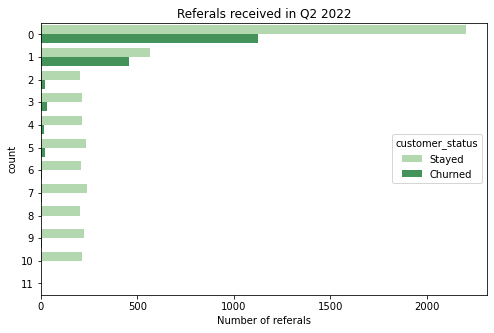

,number_of_referrals,customer_status,count
0,0,Churned,1126
1,0,Stayed,2203
2,1,Churned,455
3,1,Stayed,564
4,2,Churned,23
5,2,Stayed,203
6,3,Churned,30
7,3,Stayed,215
8,4,Churned,16
9,4,Stayed,215


In [81]:
#plot for number of referrals
plt.figure(figsize=[8, 5])

sb.countplot(data = telecom, y = 'number_of_referrals',hue='customer_status', palette='Greens');

plt.title('Referals received in Q2 2022')
plt.xlabel('Number of referals')
plt.ylabel('count')
plt.show()

telecom.groupby(['number_of_referrals','customer_status'])['customer_status'].count().reset_index(name='count')


Churn rate and number of referrals are negatively correlated, as the number of referrals increases the churn rate reduces.

,Total,Revenue
customer_status,,
Churned,1687,3330070.68
Stayed,4720,17632392.12


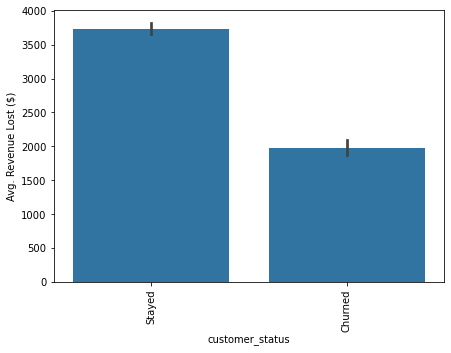

In [64]:
#Total revenue lost due to churns

base_color = sb.color_palette()[0]

plt.figure(figsize=(7, 5))
sb.barplot( data=telecom ,y='total_revenue', x='customer_status', color=base_color)
plt.ylabel('Avg. Revenue Lost ($)')
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

telecom.groupby(['customer_status']).agg({'customer_status': 'count', 'total_revenue': 'sum'}).rename(columns={'customer_status': 'Total', 'total_revenue':'Revenue'})

The company lost revenue worth USD 3,684,459.82 for the quarter, this is a worrying trend that the company needs to address.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Majority of the customers who churned were charged lower than those who stayed. Majority Customers who churned was due to dissatifaction of the services were the highest charged, followed by price and competitors. Besides, We have the highest outliers in the competitors which shows we had several clients who billed highly. Finally,attitude of the company and its staff. The number of referrals increased as the churn rate reduced.
Its interesting as the charges for extra data charges increased the churn rate reduced. Majority of the churned customers did not receive any offer, for customers who received offer E majority churned.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Majority of the customers who churned had not subscripted to any plan that is online security plan, online backup plan, online protection plan and premium tech support subscription.
The company lost revenue worth USD 3,684,459.82 for the quarter, this is a worrying trend that the company needs to address.



## Multivariate Exploration

In the next plots I will focus entirely on the churned customers. This inorder to investigate further the main causes of churn.

#### Total long distance charges across customer status and churn category

In [100]:
#churned dataframe for phone customers
telecom_churned = telecom.query('phone_service == "Yes" and customer_status == "Churned"')

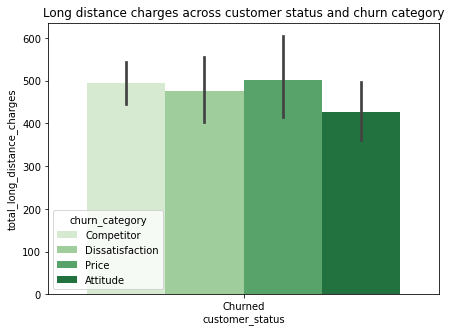

In [153]:
fig = plt.figure(figsize = [7,5])
sb.barplot(data = telecom_churned, x = 'customer_status', y = 'total_long_distance_charges', hue = 'churn_category',
           palette = 'Greens')
plt.title('Long distance charges across customer status and churn category')

plt.show();


The major cause of churn for customers who churned due to long distance charges was price, competitors, dissatisfaction and finally attitude of the service provider.

#### Total extra data charges across customer status and churn category

In [111]:
#churned dataframe for internet customers
telecom_churned2 = telecom.query('internet_service == "Yes" and customer_status == "Churned"')

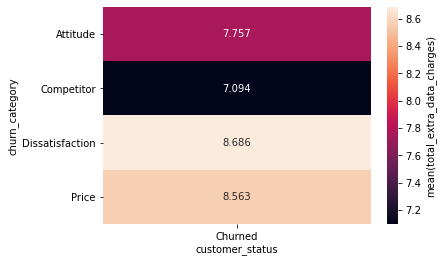

In [112]:
#heatmap
total_charges_means = telecom_churned2.groupby(['customer_status', 'churn_category']).mean()['total_extra_data_charges']
total_charges_means = total_charges_means.reset_index(name = 'total_extra_data_charges_avg')
total_charges_means = total_charges_means.pivot(index = 'churn_category', columns = 'customer_status',
                            values = 'total_extra_data_charges_avg')
sb.heatmap(total_charges_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(total_extra_data_charges)'});

The major cause of churn for customers who subscribed to extra data charges were price, dissatisfaction, attitude and finally competitors of the service provider.

#### Total  charges across customer status and churn category

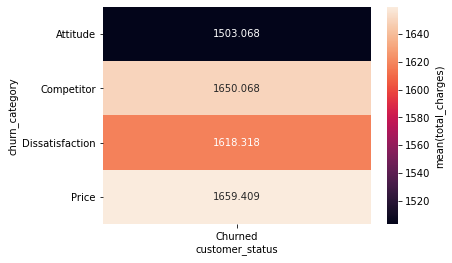

In [84]:
#plot for total charges vs customer status & churn category
total_charges_means = telecom_churned.groupby(['customer_status', 'churn_category']).mean()['total_charges']
total_charges_means = total_charges_means.reset_index(name = 'total_charges_avg')
total_charges_means = total_charges_means.pivot(index = 'churn_category', columns = 'customer_status',
                            values = 'total_charges_avg')
sb.heatmap(total_charges_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(total_charges)'});


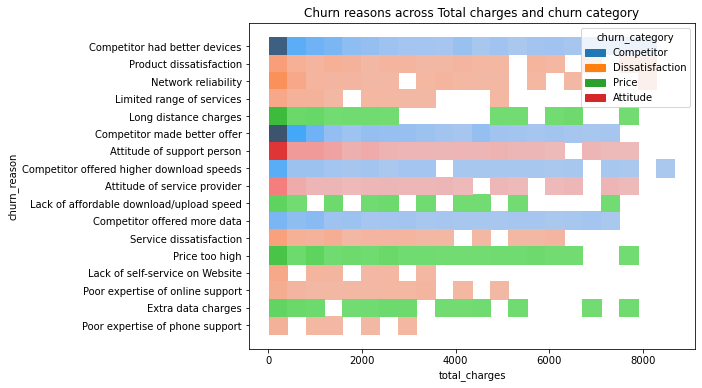

In [103]:
#reasons for churn across long distance charges
fig = plt.figure(figsize = [8,6])
sb.histplot(data = telecom_churned, x = 'total_charges', y = 'churn_reason', hue = 'churn_category',
           );
plt.title('Churn reasons across Total charges and churn category');

Intrestingly, as the case for long distance charges, the major cause of churn for customers who churned due to total charges was price, competitors, dissatisfaction and finally attitude of the service provider.
I investigated further the reason for churn, the major reasons for churn under Price are Price too high, extra data charges, long distance charges and lack affordable download/upload speed.
Churn reasons under competitors were competitors had better devices, they made better offers, they offered higher download speeds and more data.
Under dissatisfaction customers mainly churned due to product & services dissatisfaction, network realibility limited range of services and poor expertise of phone & online support.
For Attitude customers mainly churned due to attitude of support persons and the company.

#### Online backup, Online security,Device protection plan, Premium tech support  across customer status and churn category

In [115]:
#creating dataframes
backup = telecom.groupby(['customer_status','online_backup', 'churn_category'])['online_backup'].size()
backup = backup.reset_index(name='count')
device = telecom.groupby(['customer_status','device_protection_plan', 'churn_category'])['device_protection_plan'].size()
device = device.reset_index(name='count')
security = telecom.groupby(['customer_status','online_security', 'churn_category'])['online_security'].size()
security = security.reset_index(name='count')
tech = telecom.groupby(['customer_status','premium_tech_support', 'churn_category'])['premium_tech_support'].size()
tech = tech.reset_index(name='count')

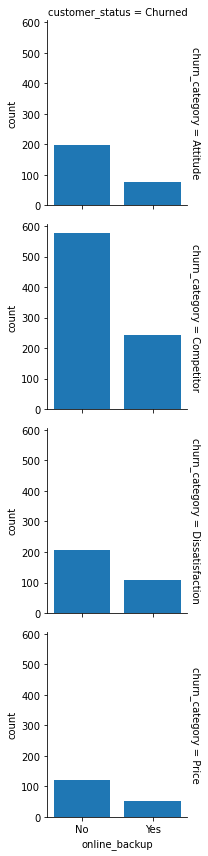

In [117]:
g = sb.FacetGrid(backup, col = 'customer_status',row = 'churn_category', margin_titles = True);
g.map(plt.bar, 'online_backup', 'count');


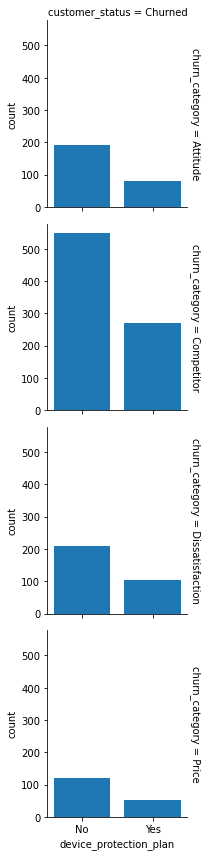

In [118]:
g = sb.FacetGrid(device, col = 'customer_status',row = 'churn_category', margin_titles = True);
g.map(plt.bar, 'device_protection_plan', 'count');


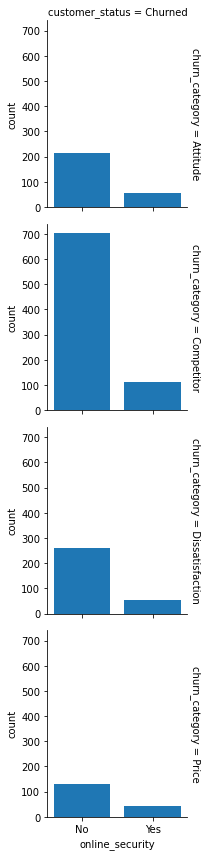

In [119]:
g = sb.FacetGrid(security, col = 'customer_status',row = 'churn_category', margin_titles = True);
g.map(plt.bar, 'online_security', 'count');

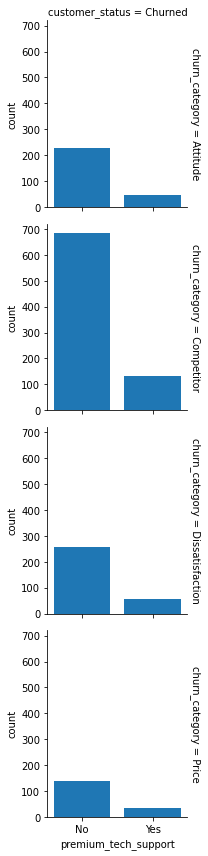

In [120]:
g = sb.FacetGrid(tech, col = 'customer_status',row = 'churn_category', margin_titles = True);
g.map(plt.bar, 'premium_tech_support', 'count');

Interestingly, customers who had subscribed for online backup, online security, device protection plan and premium tech support  services churned less than the customer who had not. Additionally, majority of the churns were attributed to the company’s competitors.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I investigated further the churned customer status by churn category. The multivariate exploration enabled me to identify the major categories of churn for the features of interest. These categories were mainly price, dissatisfaction, and competitors. I was interested to find out the reasons for churn and investigated further for the Total charges, the major reasons for churn under Price were Prices were too high, extra data charges, long distance charges and lack affordable download/upload speed.
Churn reasons under competitors were competitors had better devices, they made better offers, they offered higher download speeds and more data.
Under dissatisfaction customers mainly churned due to product & services dissatisfaction, network reliability limited range of services and poor expertise of phone & online support.
For Attitude customers mainly churned due to attitude of support persons and the company.


### Were there any interesting or surprising interactions between features?

I was curious to find out the churn levels where customers subscribed or did not for online backup, online security, device protection plan and premium tech support. Interestingly, customers who had subscribed to the above services churned less than the customer who had not. Additionally, majority of the churns were attributed to the company’s competitors.

## Conclusions

A considerable percentage of customers churned for Q2, a total of 1,869 customers churned compared to 454 customers who subscribed to the company services. The churn translated to a revenue loss of USD 3,684,459.82. This is a worrying trend that the company need to address.

The churns were attributed to 4 main factors: Competition, Dissatisfaction of the customers with the company’s services and products, attitude of the company’s staff and the company itself and finally price of the company services. These been 841, 321,314 & 211 respectively.

40% of the fiber optic client churned, the top reasons for churn were competitors had better devices, made better offers and data. Besides, the attitude of the support persons was also a major reason.
Majority of the customers who churned had not subscribed to any plan that is online security plan, online backup plan, online protection plan and premium tech support subscription. Additionally, majority of the churns were attributed to the company’s competitors.

Majority Customers who churned was due to dissatisfaction of the services were the highest charged, followed by price and competitors. Besides, we have the highest outliers in the competitors which shows we had several clients who billed highly. Finally, attitude of the company and its staff.

Majority of the churned customers did not receive any offer, for customers who received offer E majority churned.
The major cause of churn for customers who churned due to total charges was price, competitors, dissatisfaction and finally attitude of the service provider. The major reasons for churn under Price are Price too high, extra data charges, long distance charges and lack affordable download/upload speed. Churn reasons under competitors were competitors had better devices, they made better offers, they offered higher download speeds and more data. Under dissatisfaction customers mainly churned due to product & services dissatisfaction, network reliability limited range of services and poor expertise of phone & online support. For Attitude customers mainly churned due to attitude of support persons and the company.




#### Limitations 

There was no data indicating the specific services churned for customers who had both phone and internet services. It was also not clear if the customers churned both services and also the additional services they subsribed to that is  online security plan, online backup plan, online protection plan and premium tech support